In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.use('pgf')
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.texsystem": "pdflatex",     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
         r"\usepackage{times}",            # load additional packages
    ])
})

In [3]:
def make_plot(path, ax, which=['li', 'avg'], **kwargs):
    lines = open(path).readlines()

    li_ys = []
    avg_ys = []
    xs = []

    for line in lines:
        if line.startswith("Iteration"):
            toks = line.split()
            iteration = float(toks[1].replace('.', ''))
            li_gap = float(toks[7])
            avg_gap = float(toks[13])

            xs += [iteration]
            li_ys += [li_gap]
            avg_ys += [avg_gap]

    if 'li' in which:
        ax.loglog(xs, li_ys, **kwargs)
    if 'avg' in which:
        ax.loglog(xs, avg_ys, **kwargs)
    # ax.grid()


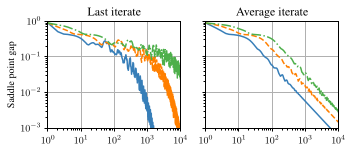

In [4]:
k = 1.0
figsize = (k * 5, k * 2.2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize, sharex=True, sharey=True)
make_plot('kuhn_eta0.25.log', ax1, which=['li'] , color="#377eb8", ls="-" , label=r"$\eta = \frac{1}{4 \|\mathbf{A}\|_2}$")
make_plot('kuhn_eta0.10.log', ax1, which=['li'] , color="#ff7f00", ls="--", label=r"$\eta = \frac{1}{10 \|\mathbf{A}\|_2}$")
make_plot('kuhn_eta0.05.log', ax1, which=['li'] , color="#4daf4a", ls="-.", label=r"$\eta = \frac{1}{20 \|\mathbf{A}\|_2}$")

make_plot('kuhn_eta0.25.log', ax2, which=['avg'], color="#377eb8", ls="-" , label=r"$\eta = \frac{1}{4 \|\mathbf{A}\|_2}$")
make_plot('kuhn_eta0.10.log', ax2, which=['avg'], color="#ff7f00", ls="--", label=r"$\eta = \frac{1}{10 \|\mathbf{A}\|_2}$")
make_plot('kuhn_eta0.05.log', ax2, which=['avg'], color="#4daf4a", ls="-.", label=r"$\eta = \frac{1}{20 \|\mathbf{A}\|_2}$")


ax1.set_ylim(1e-3, 1)
ax1.set_xticks([float(f'{k}e{n}') for k in range(2,10) for n in range(4)], minor=True)
ax1.set_xticks([1e0, 1e1, 1e2, 1e3, 1e4])
# ax1.set_xticklabels([])
ax1.set_xlim(1, 1e4)

ax1.set_title("Last iterate")
ax2.set_title("Average iterate")
ax1.set_ylabel("Saddle point gap")
# ax1.legend(fontsize='small', ncol=3)

for ax in (ax1, ax2):
    ax.grid()
    # ax.set_xlabel("Iterations")

fig.tight_layout()
fig.savefig("kuhn_experiments.pdf", bbox_inches="tight")
fig

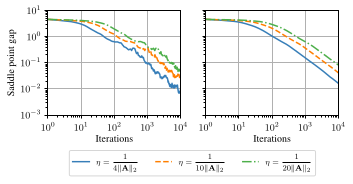

In [7]:
k = 1.0
figsize = (k * 5, k * 2.2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize, sharex=True, sharey=True)

make_plot('leduc_eta0.25.log', ax1, which=['li'] , color="#377eb8", ls="-" , label=r"$\eta = \frac{1}{4 \|\mathbf{A}\|_2}$")
make_plot('leduc_eta0.10.log', ax1, which=['li'] , color="#ff7f00", ls="--", label=r"$\eta = \frac{1}{10 \|\mathbf{A}\|_2}$")
make_plot('leduc_eta0.05.log', ax1, which=['li'] , color="#4daf4a", ls="-.", label=r"$\eta = \frac{1}{20 \|\mathbf{A}\|_2}$")

make_plot('leduc_eta0.25.log', ax2, which=['avg'], color="#377eb8", ls="-" , label=r"$\eta = \frac{1}{4 \|\mathbf{A}\|_2}$")
make_plot('leduc_eta0.10.log', ax2, which=['avg'], color="#ff7f00", ls="--", label=r"$\eta = \frac{1}{10 \|\mathbf{A}\|_2}$")
make_plot('leduc_eta0.05.log', ax2, which=['avg'], color="#4daf4a", ls="-.", label=r"$\eta = \frac{1}{20 \|\mathbf{A}\|_2}$")


ax1.set_ylim(1e-3, 10)
ax1.set_xticks([float(f'{k}e{n}') for k in range(2,10) for n in range(4)], minor=True)
ax1.set_xticks([1e0, 1e1, 1e2, 1e3, 1e4])
ax1.set_xlim(1, 1e4)

# ax1.set_title("Last iterate")
# ax2.set_title("Average iterate")
ax1.set_ylabel("Saddle point gap")

for ax in (ax1, ax2):
    ax.grid()
    ax.set_xlabel("Iterations")

def export_legend(legend, filename="legend.pdf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

fig.tight_layout()
legend = ax1.legend(fontsize='small', ncol=3, bbox_to_anchor = (2.05, -0.3))
fig.savefig("leduc_experiments.pdf", bbox_inches="tight")

# export_legend(legend)
fig
